In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('./../../Data/Part 1 - Artificial Neural Networks (ANN)/Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [5]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

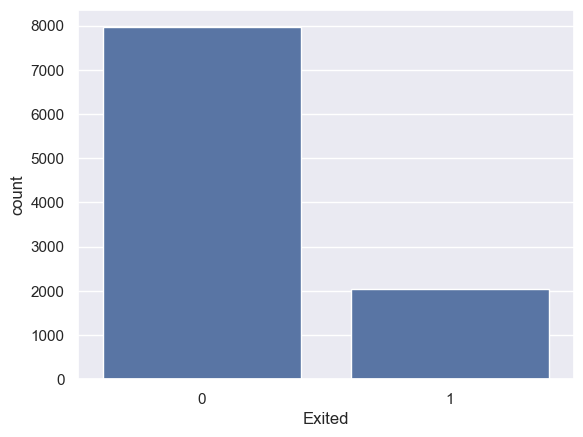

In [8]:
sns.countplot(data=data, x='Exited')

In [9]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [11]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data['Gender'].value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

In [13]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [14]:
data = pd.get_dummies(data=data, columns=['Geography'], drop_first=True)

In [15]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [16]:
dummy_cols = data.select_dtypes(include='bool').columns
data[dummy_cols] = data[dummy_cols].astype(int)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [17]:
data.columns.values

array(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_Germany', 'Geography_Spain'], dtype=object)

In [18]:
columns = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
           'Geography_Germany', 'Geography_Spain', 'Exited']

data = data[columns]

In [19]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,0,0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from collections import Counter

In [25]:
Counter(y_train)

Counter({0: 6356, 1: 1644})

In [26]:
from imblearn.combine import SMOTETomek

In [27]:
smt = SMOTETomek(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [28]:
Counter(y_train)

Counter({0: 6252, 1: 6252})

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
model = Sequential()

model.add(Dense(units=11, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[early_stop])

Epoch 1/500
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6863 - val_loss: 0.6515
Epoch 2/500
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6564 - val_loss: 0.6219
Epoch 3/500
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6392 - val_loss: 0.6107
Epoch 4/500
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6210 - val_loss: 0.5930
Epoch 5/500
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6089 - val_loss: 0.5743
Epoch 6/500
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6034 - val_loss: 0.5648
Epoch 7/500
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5818 - val_loss: 0.5622
Epoch 8/500
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5678 - val_loss: 0.5575
Epoch 9/500
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5618 - val_loss: 0.5377
Epoch 10/500
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5631 - val_loss: 0.5290
Epoch 11/500
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5465 - val_loss: 0.5232
Epoch 12/500
391/391 ━━━━━━━━━━━━━━━━━━━━

In [31]:
loss = pd.DataFrame(model.history.history)

<Axes: >

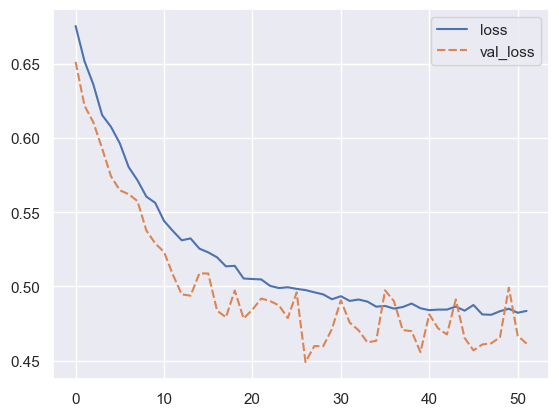

In [32]:
sns.lineplot(data=loss)

In [33]:
predictions = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [34]:
# predictions = np.argmax(predictions, axis=1) # multi-class classification
predictions = (predictions > 0.5).astype("int32") # binary classification

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(confusion_matrix(y_test, predictions))

[[1292  315]
 [ 106  287]]


In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1607
           1       0.48      0.73      0.58       393

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000



In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
predictions = model.predict(X_test)

In [41]:
print(confusion_matrix(y_test, predictions))

[[1440  167]
 [ 157  236]]


In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.59      0.60      0.59       393

    accuracy                           0.84      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000

